<a href="https://colab.research.google.com/github/srihiyacine/Unicorn_Companies_learning_project_2/blob/main/Unicorn_Companies_learning_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unicorn Companies

In this activity, you are a data professional an investment firm that is attempting to invest in private companies with a valuation of at least $1 billion. These are often known as "unicorns." Your client wants to develop a better understanding of unicorns, with the hope they can be early investors in future highly successful companies. They are particularly interested in the investment strategies of the three top unicorn investors: Sequoia Capital, Tiger Global Management, and Accel.

## Step 1: Imports

In [ ]:
from rich import print

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset
https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies?select=Unicorn_Companies.csv

In [ ]:
companies = pd.read_csv('Unicorn_Companies.csv')
companies.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Unicorn_Companies.csv'

### Data Discovery

In [ ]:
print("First few rows:")
companies.head()

First few rows:

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [ ]:
print("Last few rows:")
companies.tail()

Last few rows:

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."
1073,Zwift,$1B,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners"


In [ ]:
print("DataFrame info:")
companies.info()

DataFrame info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [ ]:
print("Descriptive statistics:")
companies.describe()

Descriptive statistics:

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [ ]:
print("Dimensions of DataFrame:")
print(companies.shape)

Dimensions of DataFrame:

(1074, 10)

In [ ]:
print("Data types of columns:")
print(companies.dtypes)

Data types of columns:

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

## Step 2: Data cleaning

In [ ]:
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])
companies.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

Years To Unicorn, which is the number of years between when the company was founded and when it became a unicorn.

Subtract the Year Founded from the Date Joined, and save it to a new column called Years To Unicorn.

In [ ]:
companies['Years To Unicorn'] = companies['Date Joined'].dt.year - companies['Year Founded']

QUESTION: Why might your client be interested in how quickly a company achieved unicorn status?

Learning how quickly a company achieves unicorn status may reveal certain trends or commonalities. Your client could leverage this information to find future companies to invest in

In [ ]:
companies.describe()

,Year Founded,Years To Unicorn
count,1074.000000,1074.000000
mean,2012.895717,7.000931
std,5.698573,5.329672
min,1919.000000,-4.000000
25%,2011.000000,4.000000
50%,2014.000000,6.000000
75%,2016.000000,9.000000
max,2021.000000,98.000000


In [ ]:
print('Companies with a negative Years To Unicorn (before cleaning):')
mask_negative = companies['Years To Unicorn'] < 0
companies[mask_negative]['Company'].values

Companies with a negative Years To Unicorn (before cleaning):

array(['Yidian Zixun'], dtype=object)

A company cannot reach unicorn status before it is founded. In other words, Years to Unicorn cannot be less than 0

In [ ]:
companies[mask_negative]['Company']

714    Yidian Zixun
Name: Company, dtype: object

In [ ]:
companies.iloc[714]

Company                                               Yidian Zixun
Valuation                                                      $1B
Date Joined                                    2017-10-17 00:00:00
Industry                               Mobile & telecommunications
City                                                       Beijing
Country                                                      China
Continent                                                     Asia
Year Founded                                                  2021
Funding                                                      $151M
Select Investors    Phoenix New Media, Tianjin Haihe Industry Fund
Years To Unicorn                                                -4
Name: 714, dtype: object

In [ ]:
companies.loc[companies["Company"] == "Yidian Zixun"]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
714,Yidian Zixun,$1B,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2013,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund"


In [ ]:
companies.loc[companies['Company'] == 'Yidian Zixun', 'Year Founded'] = 2013
companies['Years To Unicorn'] = companies['Date Joined'].dt.year - companies['Year Founded']

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
print('Companies with a negative Years To Unicorn (after cleaning):')
print(companies[companies['Years To Unicorn'] < 0]['Company'].values)

Companies with a negative Years To Unicorn (after cleaning):

[]

The company provided you with the following list of industry labels to identify in the data for Industry. Note: Any industry labels that are in companies but not in industry_list are misspellings.

In [ ]:
industry_list = ['Artificial intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech',\
       'Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail',\
       'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', \
        'Travel', 'Cybersecurity','Mobile & telecommunications']

In [ ]:
print(companies['Industry'].nunique())

16

In [ ]:
print(companies['Industry'].value_counts())

Fintech                                224
Internet software & services           205
E-commerce & direct-to-consumer        111
Health                                  74
Artificial intelligence                 73
Other                                   58
Supply chain, logistics, & delivery     57
Cybersecurity                           50
Data management & analytics             41
Mobile & telecommunications             38
Hardware                                34
Auto & transportation                   31
Edtech                                  28
Consumer & retail                       25
Travel                                  14
Artificial Intelligence                 11
Name: Industry, dtype: int64

In [ ]:
companies['Industry'].value_counts().index

Index(['Fintech', 'Internet software & services',
       'E-commerce & direct-to-consumer', 'Health', 'Artificial intelligence',
       'Other', 'Supply chain, logistics, & delivery', 'Cybersecurity',
       'Data management & analytics', 'Mobile & telecommunications',
       'Hardware', 'Auto & transportation', 'Edtech', 'Consumer & retail',
       'Travel', 'Artificial Intelligence'],
      dtype='object')

In [ ]:
for industry in companies['Industry'].value_counts().index:
  print(industry)

Fintech

Internet software & services

E-commerce & direct-to-consumer

Health

Artificial intelligence

Other

Supply chain, logistics, & delivery

Cybersecurity

Data management & analytics

Mobile & telecommunications

Hardware

Auto & transportation

Edtech

Consumer & retail

Travel

Artificial Intelligence

In [ ]:
industry_dct = {
    'Artificial Intelligence':'Artificial intelligence'
               }
companies['Industry'] = companies['Industry'].replace(industry_dct)

In [ ]:
print(companies['Industry'].nunique())

15

In [ ]:
print('Number of duplicated companies (before cleaning):')
print(companies['Company'].duplicated().sum())

Number of duplicated companies (before cleaning):

1

In [ ]:
# Find duplicate rows
duplicate_rows = companies[companies.duplicated(subset='Company', keep=False)]
duplicate_rows

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years To Unicorn


In [ ]:
# Change the name of the second occurrence of the duplicated company
companies.loc[duplicate_rows.index[1], 'Company'] = 'Bolt Financial'

In [ ]:
companies['Company'].duplicated().sum()

0

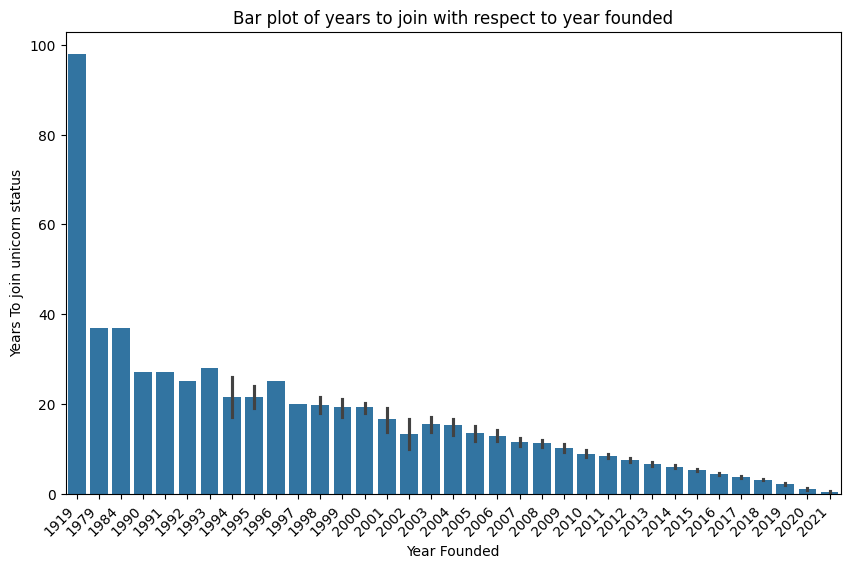

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=companies['Year Founded'],y=companies['Years To Unicorn'])
# Set title
plt.title("Bar plot of years to join with respect to year founded")
plt.xlabel('Year Founded')
plt.ylabel('Years To join unicorn status')
plt.xticks(rotation=45,horizontalalignment='right')
plt.show();

Question: What do you observe from the bar plot of years to join with respect to the year founded?

There appears to be a trend wherein companies that were founded later took less time to reach unicorn status, on average. This is biased—a bias that is common in time data—because companies founded in later years have been around for less time. Therefore, there is less time to collect data on such companies compared to companies founded in earlier years).

Create a Month Joined column


In [ ]:
companies['Month'] = companies['Date Joined'].dt.month
companies['Month Joined'] = companies['Date Joined'].dt.month_name()
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,Month,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,4,April
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,12,December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,7,July
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,1,January
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,12,December


In [ ]:
companies_2021=companies[companies['Date Joined'].dt.year ==  2021]
companies_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,Month,Month Joined
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",3,7,July
16,J&T Express,$20B,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",6,4,April
24,Blockchain.com,$14B,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",10,2,February
27,OpenSea,$13B,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",4,7,July
34,Getir,$12B,2021-03-26,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",6,3,March


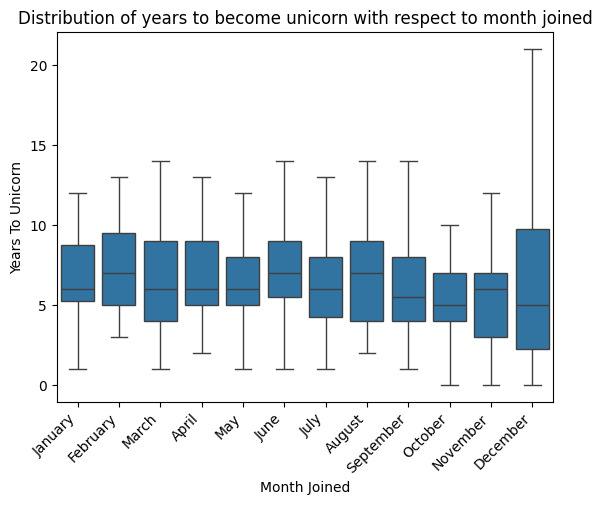

In [ ]:
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November",
               "December"]
sns.boxplot(x=companies_2021['Month Joined'],
            y=companies_2021['Years To Unicorn'],
            order = month_order,
            showfliers=False
           )

plt.title('Distribution of years to become unicorn with respect to month joined')
plt.xticks(rotation=45,horizontalalignment='right')
plt.show()

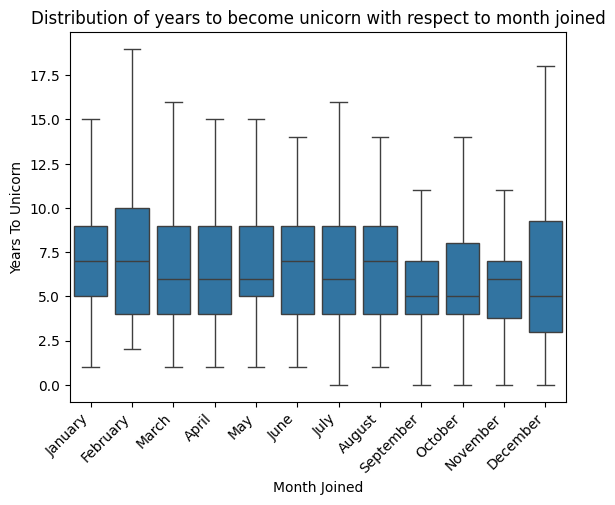

In [ ]:
sns.boxplot(x=companies['Month Joined'],
            y=companies['Years To Unicorn'],
            order = month_order,
            showfliers=False
           )

plt.title('Distribution of years to become unicorn with respect to month joined')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

Question: What do you observe from the preceding box plot?

In the preceding box plot, the median value for Years To Join is different for each month. Also, the median Years To Join is lower for the months of September and October. This could indicate that companies that reached unicorn status in early fall took less time to reach $1 billion valuation. This is because the number of companies is relatively close/consistent for each month. If that were not the case, it would be misleading to compare the median values from the box plots between months.